In [ ]:
# https://pythonmana.com/2022/03/202203301401216879.html
# https://pythonmana.com/2022/201/202207200639028118.html
# 

In [5]:
import gspread # pip install gspread
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [22]:
gc = gspread.service_account(filename='/Users/avinashronanki/secrets/sheet_secrets.json')
sh = gc.open_by_key("1mTpqEAj9AQIwvQCE8QaojUu_dtHSJldTqSw-y4yy3bQ") 
sheet  = sh.worksheet("FOA")
df = pd.DataFrame(sheet.get_all_records())

In [28]:
df

,Order_ID,Order_ref_ID,Aggregator_Order_ID,Channel,Order_State,Store,Order_date,date-time,Item ref ID,Item_Name,Quantity,Unit_Price,Total Taxes,Liability_On,Total_Charges,Total_Price,options,Serves,total_amounts
0,255949697,142411551987,142411551987,swiggy,Completed,Hinjewadi (GR),2022-08-01,12:16:05,-1,Steam Rice,1,169,6.02,aggregator,10,185.02,Half,1,185.02
1,255949697,142411551987,142411551987,swiggy,Completed,Hinjewadi (GR),2022-08-01,12:16:05,-1,Tomato Dal,1,179,6.38,aggregator,10,195.38,None,,195.38
2,255951437,142411840626,142411840626,swiggy,Completed,Hinjewadi (GR),2022-08-01,12:20:42,-1,Chicken Mogalai Biryani,1,299,11.20,aggregator,10,320.20,Half,1,320.20
3,255951437,142411840626,142411840626,swiggy,Completed,Hinjewadi (GR),2022-08-01,12:20:42,-1,Chicken 555,1,299,11.20,aggregator,10,320.20,None,,320.20
4,255967569,142414022307,142414022307,swiggy,Completed,Hinjewadi (GR),2022-08-01,12:57:26,-1,Gongura Chicken Pulav,1,559,20.45,aggregator,10,589.45,Full,2,589.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,264726367,144091576889,144091576889,swiggy,Acknowledged,Hinjewadi (GR),2022-08-20,22:56:42,-1,Gutthu Vankaya Biryani,2,269,26.90,aggregator,20,584.90,Half,1,1169.80
961,264726367,144091576889,144091576889,swiggy,Acknowledged,Hinjewadi (GR),2022-08-20,22:56:42,-1,Crispy Baby Corn,1,229,11.45,aggregator,10,250.45,None,,250.45
962,264726367,144091576889,144091576889,swiggy,Acknowledged,Hinjewadi (GR),2022-08-20,22:56:42,-1,Godavari Spl. Chicken Fry,1,319,15.95,aggregator,10,344.95,None,,344.95
963,264727098,4281167717,4281167717,zomato,Food Ready,Hinjewadi (GR),2022-08-20,22:58:14,-1,Boneless Chicken Biryani,1,299,9.96,aggregator,10,318.96,Half,1,318.96


# the most populer Item names (dishes)

Boneless Chicken Biryani              129
Godavari Chicken Fry Piece Biryani    128
Chicken Mogalai Biryani                62
Hangover Butter Milk                   40
Rajugari Kodi Pulav                    37
Konaseema Kodi Vepudu                  32
Veg Biryani                            32
Paneer Biryani                         27
Egg Biryani                            21
Special Boneless Chicken Biryani       20
Chicken Roast Biryani                  20
Chicken Dum Biryani                    20
Mushroom Biryani                       18
Curd Rice                              17
Godavari Fried Chicken                 17
Gobi 65 Biryani                        15
Steam Rice                             14
Cold Drink 250mls                      13
Tomato Dal                             13
Chicken Avakai Biryani                 13
Name: Item_Name, dtype: int64


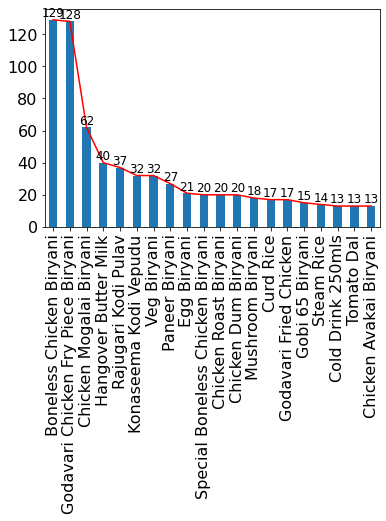

In [24]:
dishes_count = df['Item_Name'].value_counts()[:20]
print(dishes_count)
dishes_count.plot(kind='line', color=['r'])
dishes_count.plot(kind='bar', fontsize=16)
for x, y in enumerate(dishes_count):
#     print(x, y)
    plt.text(x, y + 2, y, ha='center', fontsize=12)
plt.show()

257717540    8
261758397    6
260796239    5
260796445    4
260111157    4
259542293    4
261828055    4
264622886    4
258309843    4
261110818    4
Name: Order_ID, dtype: int64


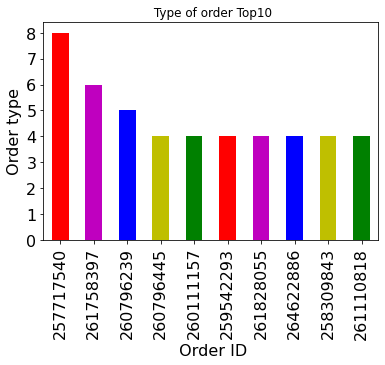

In [25]:
data_group = df['Order_ID'].value_counts()[:10]
print(data_group)
data_group.plot(kind='bar', fontsize=16, color=['r', 'm', 'b', 'y', 'g'])
plt.title(' Type of order Top10')
plt.xlabel(' Order ID', fontsize=16)
plt.ylabel(' Order type ', fontsize=16)
plt.show()

# # Order ID Order quantity Top10
top10 Order

In [45]:
df['total_amounts'] = df['Quantity'] * df['Unit_Price']

In [46]:
dataGroup = df[['Order_ID', 'Quantity', 'Unit_Price', 'total_amounts']].groupby(by='Order_ID')

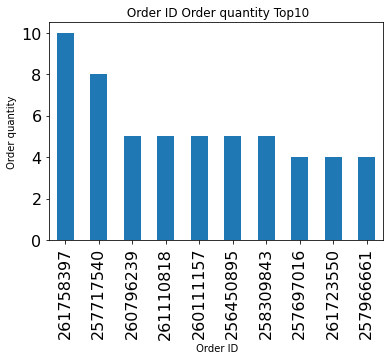

In [47]:
Group_sum = dataGroup.sum() # Grouping sum 
sort_counts = Group_sum.sort_values(by='Quantity', ascending=False) # Sort 
sort_counts['Quantity'][:10].plot(kind='bar', fontsize=16)
plt.xlabel(' Order ID')
plt.ylabel(' Order quantity ')
plt.title(' Order ID Order quantity Top10')
plt.show()

# Order consumption amount

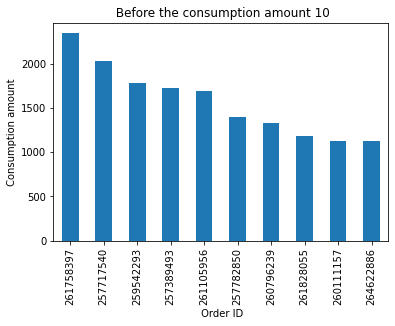

In [48]:
sort_total_amounts = Group_sum.sort_values(by='total_amounts', ascending=False)
sort_total_amounts['total_amounts'][:10].plot(kind='bar')
plt.xlabel(' Order ID')
plt.ylabel(' Consumption amount ')
plt.title(' Before the consumption amount 10')
plt.show()

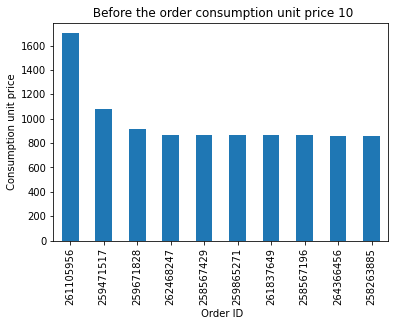

In [49]:
Group_sum['average'] = Group_sum['total_amounts'] / Group_sum['Quantity']
sort_average = Group_sum.sort_values(by='average', ascending=False)
sort_average['average'][:10].plot(kind='bar')
plt.xlabel(' Order ID')
plt.ylabel(' Consumption unit price ')
plt.title(' Before the order consumption unit price 10')
plt.show()

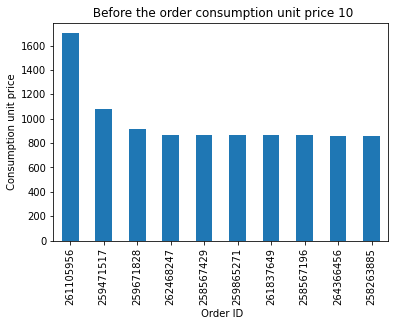

In [51]:
Group_sum['average'] = Group_sum['total_amounts'] / Group_sum['Quantity']
sort_average = Group_sum.sort_values(by='average', ascending=False)
sort_average['average'][:10].plot(kind='bar')
plt.xlabel(' Order ID')
plt.ylabel(' Consumption unit price ')
plt.title(' Before the order consumption unit price 10')
plt.show()

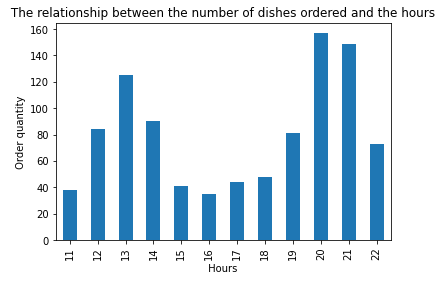

In [52]:
df['hourcount'] = 1 # New column , Use as counter 
df['time'] = pd.to_datetime(df['date-time']) # Convert time to date type storage 
df['hour'] = df['time'].map(lambda x: x.hour)
gp_by_hour = df.groupby(by='hour').count()['hourcount']
gp_by_hour.plot(kind='bar')
plt.xlabel(' Hours ')
plt.ylabel(' Order quantity ')
plt.title(' The relationship between the number of dishes ordered and the hours ')
plt.show()

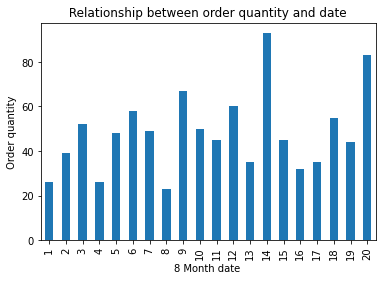

In [55]:
df['daycount'] = 1
df['Order_date']= pd.to_datetime(df['Order_date'])
df['day'] = df['Order_date'].map(lambda x: x.day) # Analyze the sky 
gp_by_day = df.groupby(by='day').count()['daycount']
gp_by_day.plot(kind='bar')
plt.xlabel('8 Month date ')
plt.ylabel(' Order quantity ')
plt.title(' Relationship between order quantity and date ')
plt.show()

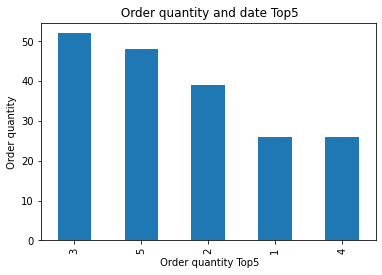

In [56]:
gp_by_day[:5].sort_values(ascending=False).plot(kind='bar')
plt.xlabel(' Order quantity Top5')
plt.ylabel(' Order quantity ')
plt.title(' Order quantity and date Top5')
plt.show()

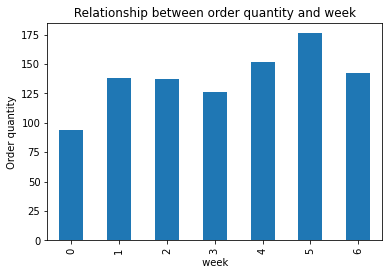

In [58]:
df['weekcount'] = 1
df['weekday'] = df['Order_date'].map(lambda x: x.weekday())
gp_by_weekday = df.groupby(by='weekday').count()['weekcount']
gp_by_weekday.plot(kind='bar')
plt.xlabel(' week ')
plt.ylabel(' Order quantity ')
plt.title(' Relationship between order quantity and week ')
plt.show()

     price
day       
1     8222
2    12523
3    15097
4     8522
5    15188
6    17934
7    16890
8     6676
9    20925
10   15388
11   14114
12   18790
13   10465
14   28278
15   13926
16    9298
17   10853
18   16672
19   14075
20   24445


ValueError: x and y must be the same size

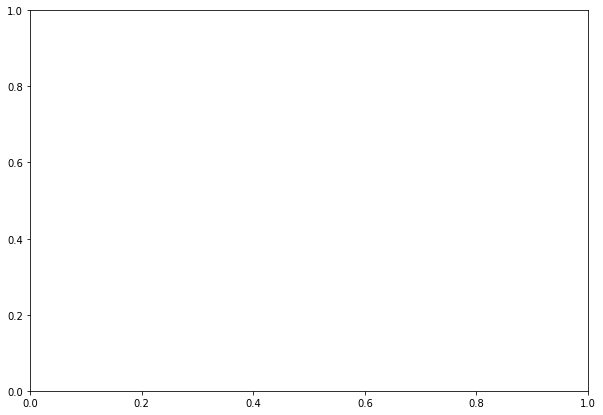

In [60]:
# Calculate sales 
df['price'] = df['Quantity'] * df['Unit_Price']
# Match the booking date to the week 
week = pd.DatetimeIndex(df['Order_date'])
df['weekday'] = week.day_name()
# Match the ordering date to the number of days in the month 
df['day'] = pd.DatetimeIndex(df['Order_date']).day
data_gb = df[['day', 'price']].groupby(by='day')
# number .agg Aggregation date and price 
number = data_gb.agg(np.sum)
print(number)
# Draw line chart 
plt.figure(figsize=(10, 7))
plt.scatter(range(1, 32), number, marker='D')
plt.plot(range(1, 32), number['price'])
plt.title('8 Schematic diagram of monthly catering sales trend ')
plt.xlabel(' date ')
plt.ylabel(' sales ')
plt.xticks(range(0, 32)[::7], range(0, 32)[::7])
plt.show()

<AxesSubplot:xlabel='Order_date'>

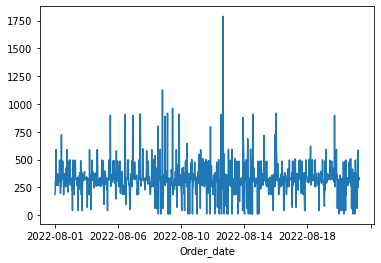

In [4]:
df.set_index('Order_date', inplace=True)
df['Total_Price'].plot()